In [1]:
import json
import pandas as pd
from pathlib import Path

In [2]:
DIR = Path(r'../data/user_data')

In [5]:
files=sorted(DIR.glob('training-session*.json'))

In [7]:
file = files[0]

In [23]:
from datetime import datetime
def polar_datetime_to_python_datetime_str(polar_dt):
    new_dt = polar_dt.replace('T', ' ')
    date_time_obj = datetime.strptime(new_dt, '%Y-%m-%d %H:%M:%S.%f')

    return date_time_obj.strftime('%Y-%m-%d+%H_%M_%S_%f')

In [41]:
dfs = list()
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)
        if 'kiloCalories' in data.keys():
            dfs.append(pd.DataFrame([[data['kiloCalories'],polar_datetime_to_python_datetime_str(data['exercises'][0]['startTime']).split('+')[0]]],columns=['Calories','Date']))

df = pd.concat(dfs)

In [40]:
polar_datetime_to_python_datetime_str(data['exercises'][0]['startTime']).split('+')[0]

'2022-01-27'

In [43]:
df['Date']=pd.to_datetime(df['Date'])

<AxesSubplot:xlabel='Date', ylabel='Calories'>

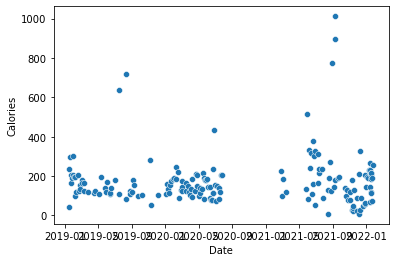

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='Date',y='Calories',data=df)